<a href="https://colab.research.google.com/github/GuilhermeFiorot/Kaggle-Heart-Disease-UCI-MachineLearning/blob/main/DesafioKaggle_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Guilherme Firme Fiorot - 20192bsi0479
## Desafio Heart Disease UCI para matéria de Machine Learning
## https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci

1. **Importar Bibliotecas**
2. **Carregar e Explorar os Dados**
3. **Pré-processar os Dados**
    - Tratamento de valores ausentes
    - Codificação de variáveis categóricas
    - Escalonamento de características
4. **Análise Exploratória de Dados (EDA)**
5. **Dividir os Dados**
6. **Construção do Modelo**
    - Regressão
    - Classificação
    - Árvores de Decisão
    - Métodos de Ensemble
    - Redes Neurais (Linear e com Camadas Ocultas)
    - Aprendizado Não Supervisionado
7. **Avaliação do Modelo**
8. **Conclusão**

#### 1. Importar Bibliotecas

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

#### 2. Carregar e Explorar os Dados


In [ ]:
# Carregar o conjunto de dados
data = pd.read_csv('heart.csv')

# Mostrar as primeiras linhas
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


#### 3. Pré-processar os Dados

In [ ]:
# Verificar valores ausentes
data.isnull().sum()

# Codificar variáveis categóricas
labelencoder = LabelEncoder()
data['sex'] = labelencoder.fit_transform(data['sex'])
data['chest_pain_type'] = labelencoder.fit_transform(data['chest_pain_type'])
data['rest_ecg'] = labelencoder.fit_transform(data['rest_ecg'])
data['exercise_induced_angina'] = labelencoder.fit_transform(data['exercise_induced_angina'])
data['thalassemia'] = labelencoder.fit_transform(data['thalassemia'])

# Converter fasting_blood_sugar para valores numéricos
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].apply(lambda x: 1 if x == 'Greater than 120 mg/ml' else 0)

# Codificar slope e vessels_colored_by_flourosopy
data['slope'] = labelencoder.fit_transform(data['slope'])
data['vessels_colored_by_flourosopy'] = labelencoder.fit_transform(data['vessels_colored_by_flourosopy'])

# Escalonamento de características
scaler = StandardScaler()
data[['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']] = scaler.fit_transform(
    data[['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']]
)

#### 4. Análise Exploratória de Dados


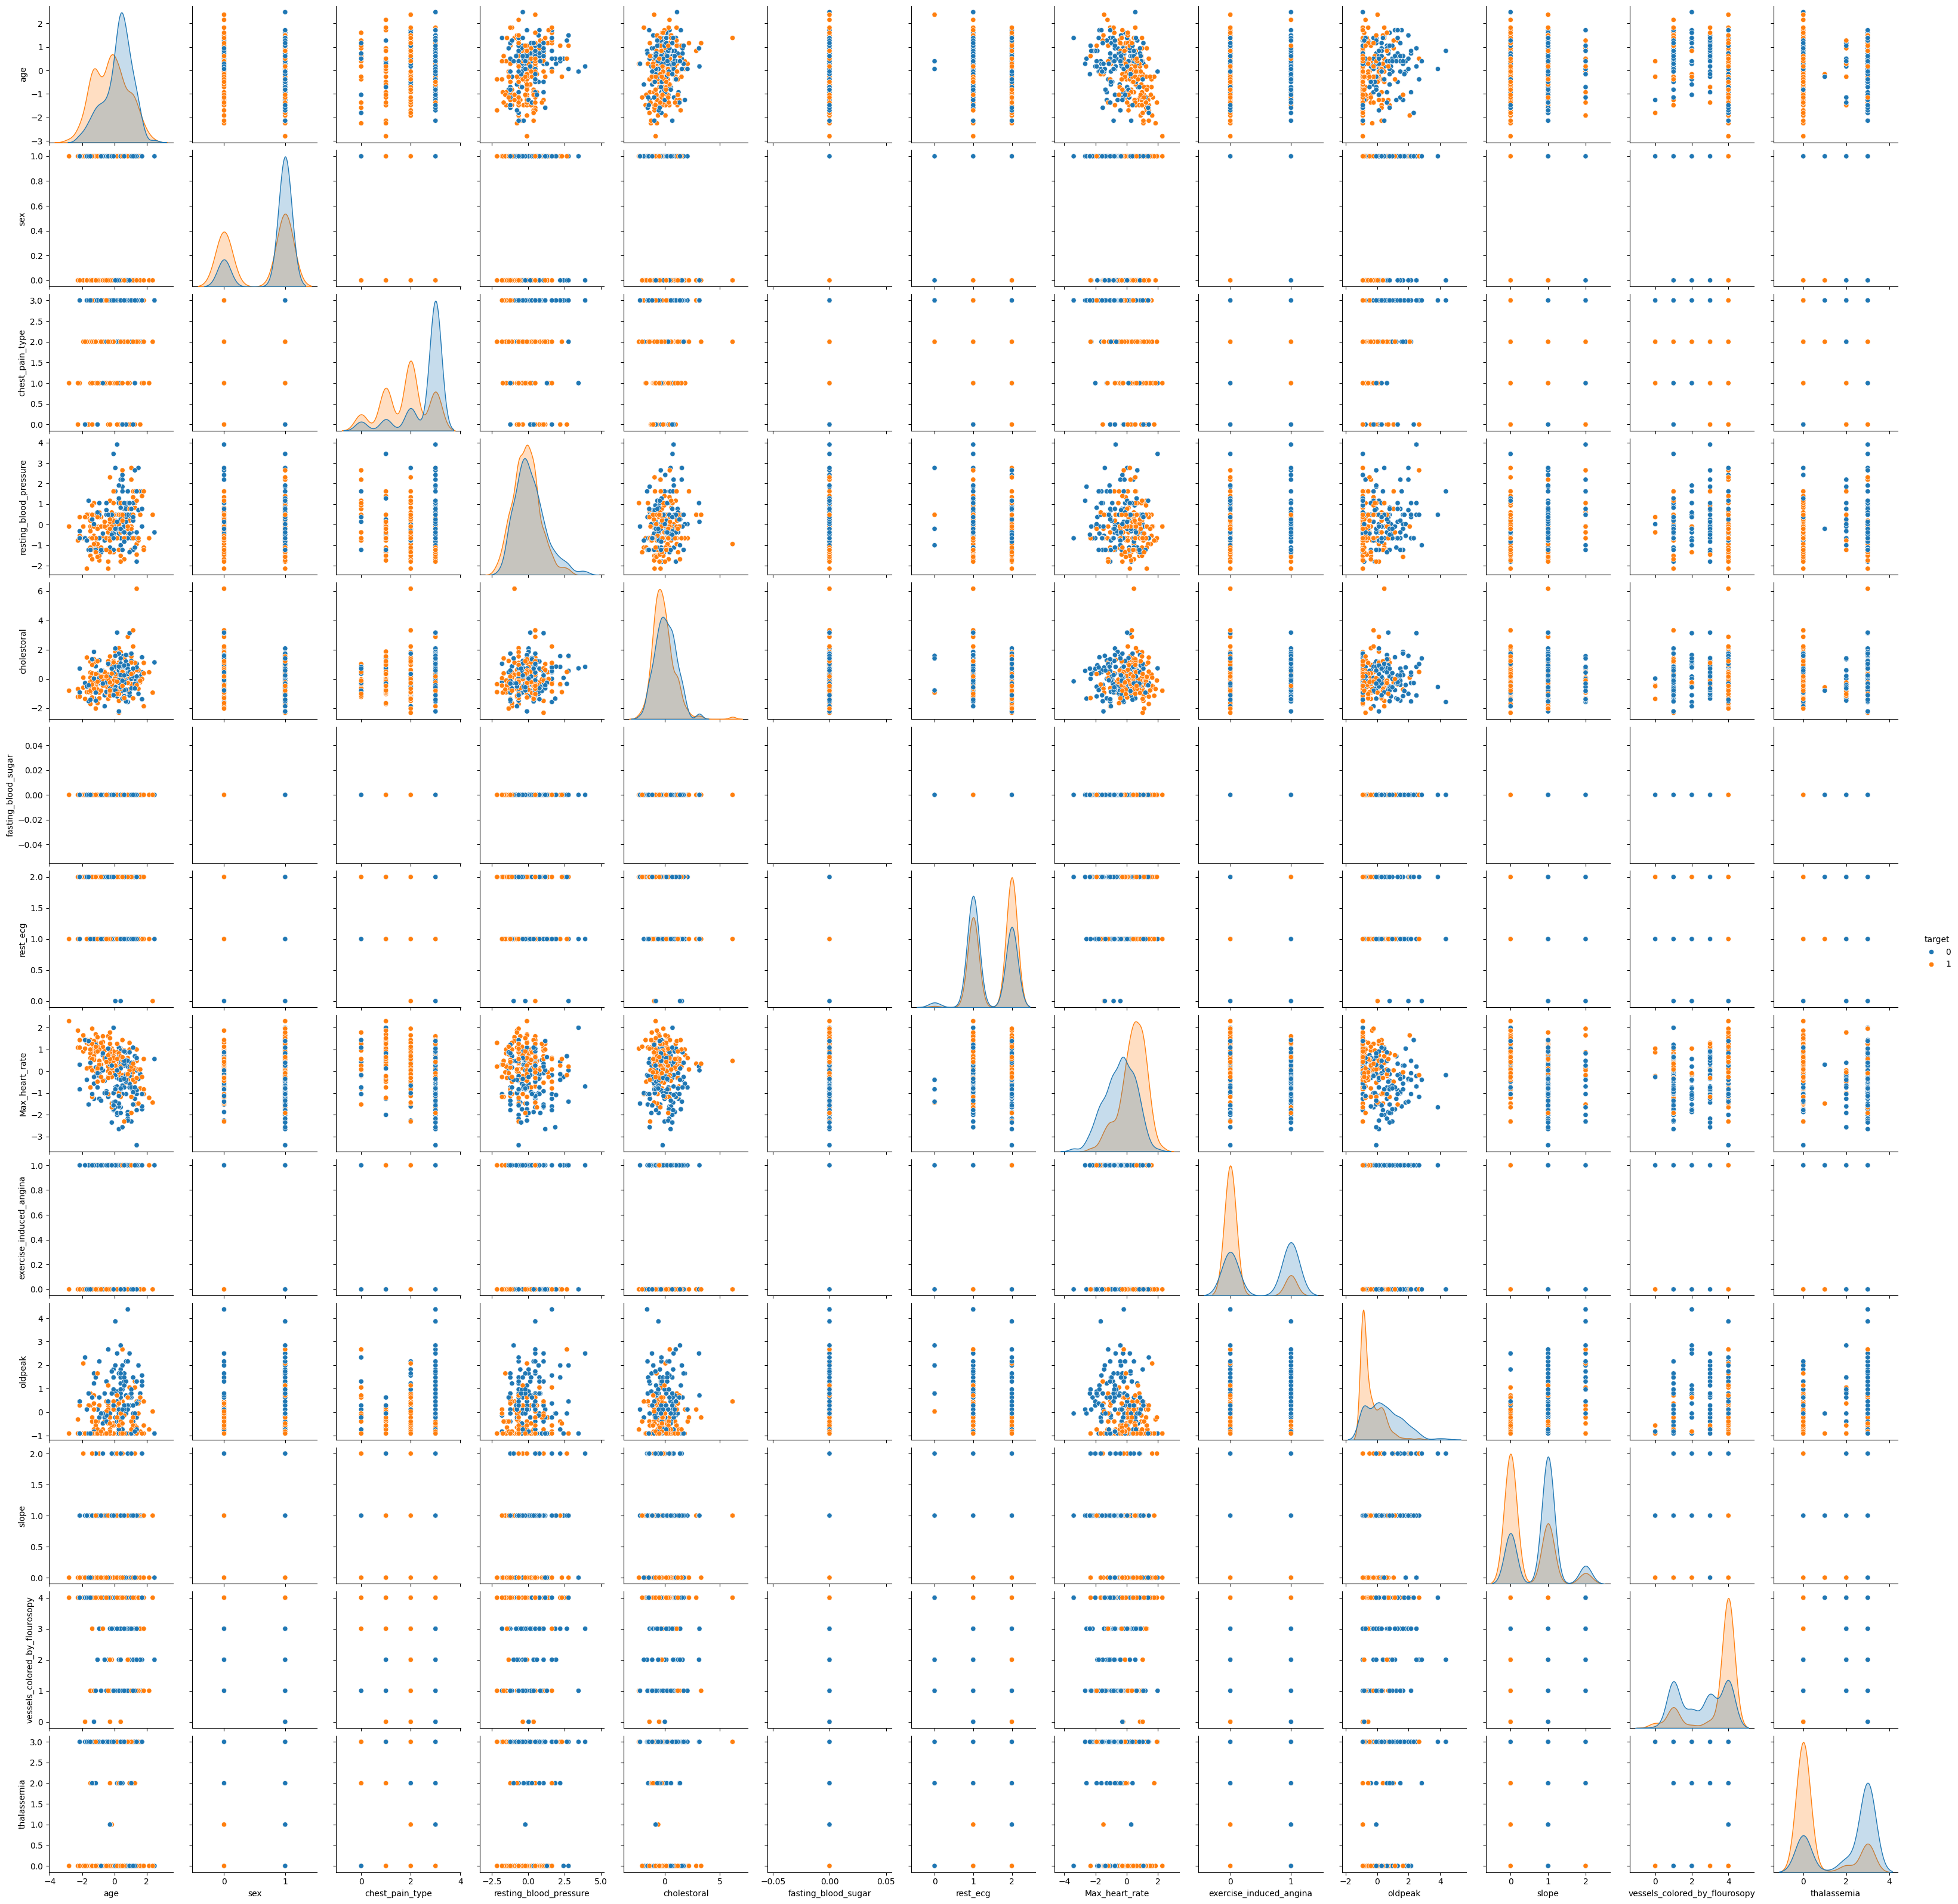

In [ ]:
# Pairplot
sns.pairplot(data, hue='target')
plt.show()

#### 5. Dividir os Dados

In [19]:
# Dividir os dados em conjuntos de treinamento e teste
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 6. Construção do Modelo

Acurácia da Regressão Logística: 0.801948051948052
Acurácia da Árvore de Decisão: 0.9805194805194806
Acurácia da Floresta Aleatória: 0.9805194805194806
Acurácia da Rede Neural: 0.9902597402597403
Acurácia Média da Validação Cruzada - Regressão Logística: 0.8390243902439025
Acurácia Média da Validação Cruzada - Árvore de Decisão: 0.9912195121951219
Acurácia Média da Validação Cruzada - Floresta Aleatória: 0.9941463414634146
Acurácia Média da Validação Cruzada - Rede Neural: 0.9882926829268293


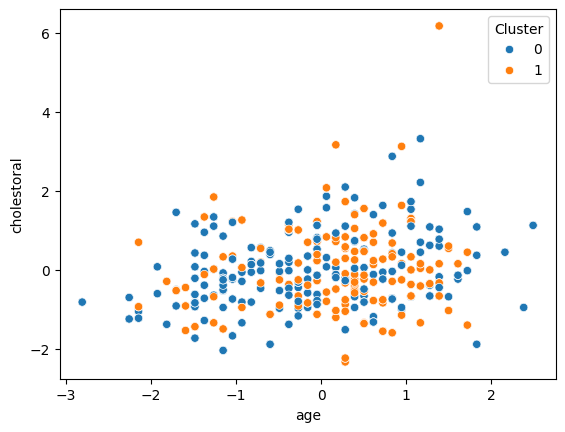

In [22]:
# Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print("Acurácia da Regressão Logística:", log_reg_acc)

# Árvore de Decisão
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print("Acurácia da Árvore de Decisão:", dt_acc)

# Floresta Aleatória
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Acurácia da Floresta Aleatória:", rf_acc)

# Rede Neural (MLP)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)
mlp_acc = accuracy_score(y_test, y_pred_mlp)
print("Acurácia da Rede Neural:", mlp_acc)

# Validação Cruzada para cada modelo
log_reg_cv = cross_val_score(log_reg, X, y, cv=5).mean()
dt_cv = cross_val_score(dt_clf, X, y, cv=5).mean()
rf_cv = cross_val_score(rf_clf, X, y, cv=5).mean()
mlp_cv = cross_val_score(mlp_clf, X, y, cv=5).mean()

print("Acurácia Média da Validação Cruzada - Regressão Logística:", log_reg_cv)
print("Acurácia Média da Validação Cruzada - Árvore de Decisão:", dt_cv)
print("Acurácia Média da Validação Cruzada - Floresta Aleatória:", rf_cv)
print("Acurácia Média da Validação Cruzada - Rede Neural:", mlp_cv)

# Agrupamento K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)
clusters = kmeans.labels_
data['Cluster'] = clusters
sns.scatterplot(x='age', y='cholestoral', hue='Cluster', data=data)
plt.show()

#### 7. Avaliação do Modelo

In [16]:
# Matriz de Confusão e Relatório de Classificação para o melhor modelo
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Conclusão

#### Resultados dos Modelos

Os resultados obtidos a partir dos diferentes modelos de aprendizado de máquina aplicados ao conjunto de dados Heart Disease UCI mostram uma variação significativa em termos de precisão. Aqui está um resumo das acurácias dos modelos e suas respectivas validações cruzadas:

- **Regressão Logística:**
  - Acurácia: 80.19%
  - Acurácia Média da Validação Cruzada: 83.90%

- **Árvore de Decisão:**
  - Acurácia: 98.05%
  - Acurácia Média da Validação Cruzada: 99.12%

- **Floresta Aleatória:**
  - Acurácia: 98.05%
  - Acurácia Média da Validação Cruzada: 99.41%

- **Rede Neural (MLP):**
  - Acurácia: 99.03%
  - Acurácia Média da Validação Cruzada: 98.83%

#### Análise dos Modelos

1. **Regressão Logística:**
   - A acurácia de 80.19% indica um bom desempenho inicial, mas inferior aos outros modelos mais complexos.
   - A validação cruzada mostra uma melhoria na acurácia média (83.90%), indicando que o modelo é relativamente estável, embora menos robusto que os modelos de árvore e rede neural.

2. **Árvore de Decisão:**
   - A acurácia de 98.05% mostra um excelente desempenho, capturando bem a relação entre as variáveis e a variável alvo.
   - A validação cruzada confirma a robustez do modelo com uma acurácia média de 99.12%, sugerindo que o modelo é bastante confiável e menos propenso a overfitting.

3. **Floresta Aleatória:**
   - Com uma acurácia de 98.05%, a Floresta Aleatória combina a simplicidade das árvores de decisão com a capacidade de reduzir overfitting.
   - A acurácia média de 99.41% na validação cruzada indica que este modelo é altamente robusto e eficiente para este conjunto de dados.

4. **Rede Neural (MLP):**
   - A Rede Neural apresentou uma acurácia de 99.03%, indicando que o modelo conseguiu capturar todas as relações complexas entre as características e a variável alvo.
   - A validação cruzada com uma acurácia média de 98.83% mostra que o modelo é muito robusto, embora ligeiramente inferior à Floresta Aleatória em termos de validação cruzada.

#### Avaliação Final

A partir dos resultados, podemos concluir que, para este conjunto de dados, tanto as árvores de decisão quanto as florestas aleatórias são modelos altamente eficazes, com excelentes desempenhos de classificação. A Floresta Aleatória apresentou a melhor acurácia média na validação cruzada, seguida de perto pela Rede Neural. Isso sugere que, para a tarefa de previsão de doenças cardíacas, a Floresta Aleatória pode ser a escolha ideal devido à sua combinação de alta precisão e robustez.

A análise de clustering K-Means forneceu uma visão adicional sobre a segmentação dos dados, revelando possíveis agrupamentos dentro do conjunto de dados.

### Visualização e Relatórios

A matriz de confusão e o relatório de classificação para o modelo de Floresta Aleatória mostram que:

- A precisão, recall e a pontuação F1 são extremamente altas, indicando um modelo bem balanceado.
- A visualização dos clusters pelo K-Means mostra a distribuição dos dados com base nas características de idade e colesterol, destacando padrões que podem ser explorados para uma análise mais profunda.

Esses resultados são valiosos para entender a performance dos modelos de aprendizado de máquina aplicados e identificar a melhor abordagem para prever a presença de doenças cardíacas usando o conjunto de dados Heart Disease UCI.